<a href="https://colab.research.google.com/github/mikkayadu/Breast-Cancer-Classification-Using-XGBoost/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Winsconsin Breast Cancer Classification</h1>

In [1]:
!pip install xgboost

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


**<h2>Reading the Dataset**

In [4]:
df = pd.read_csv('breast_cancer.csv')

In [5]:
print(df.shape)
df.head()


(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**<h2>Peforming One-Hot Encoding on the Categorical variable**

In [6]:
df = df[df.columns[:-1]]
df = pd.get_dummies(df, drop_first=True)
df = df.rename(columns={'diagnosis_M': 'target'})


In [7]:
df.drop('id', axis=1, inplace=True)
df.target = df['target'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

**<h2>Histogram of All Features**

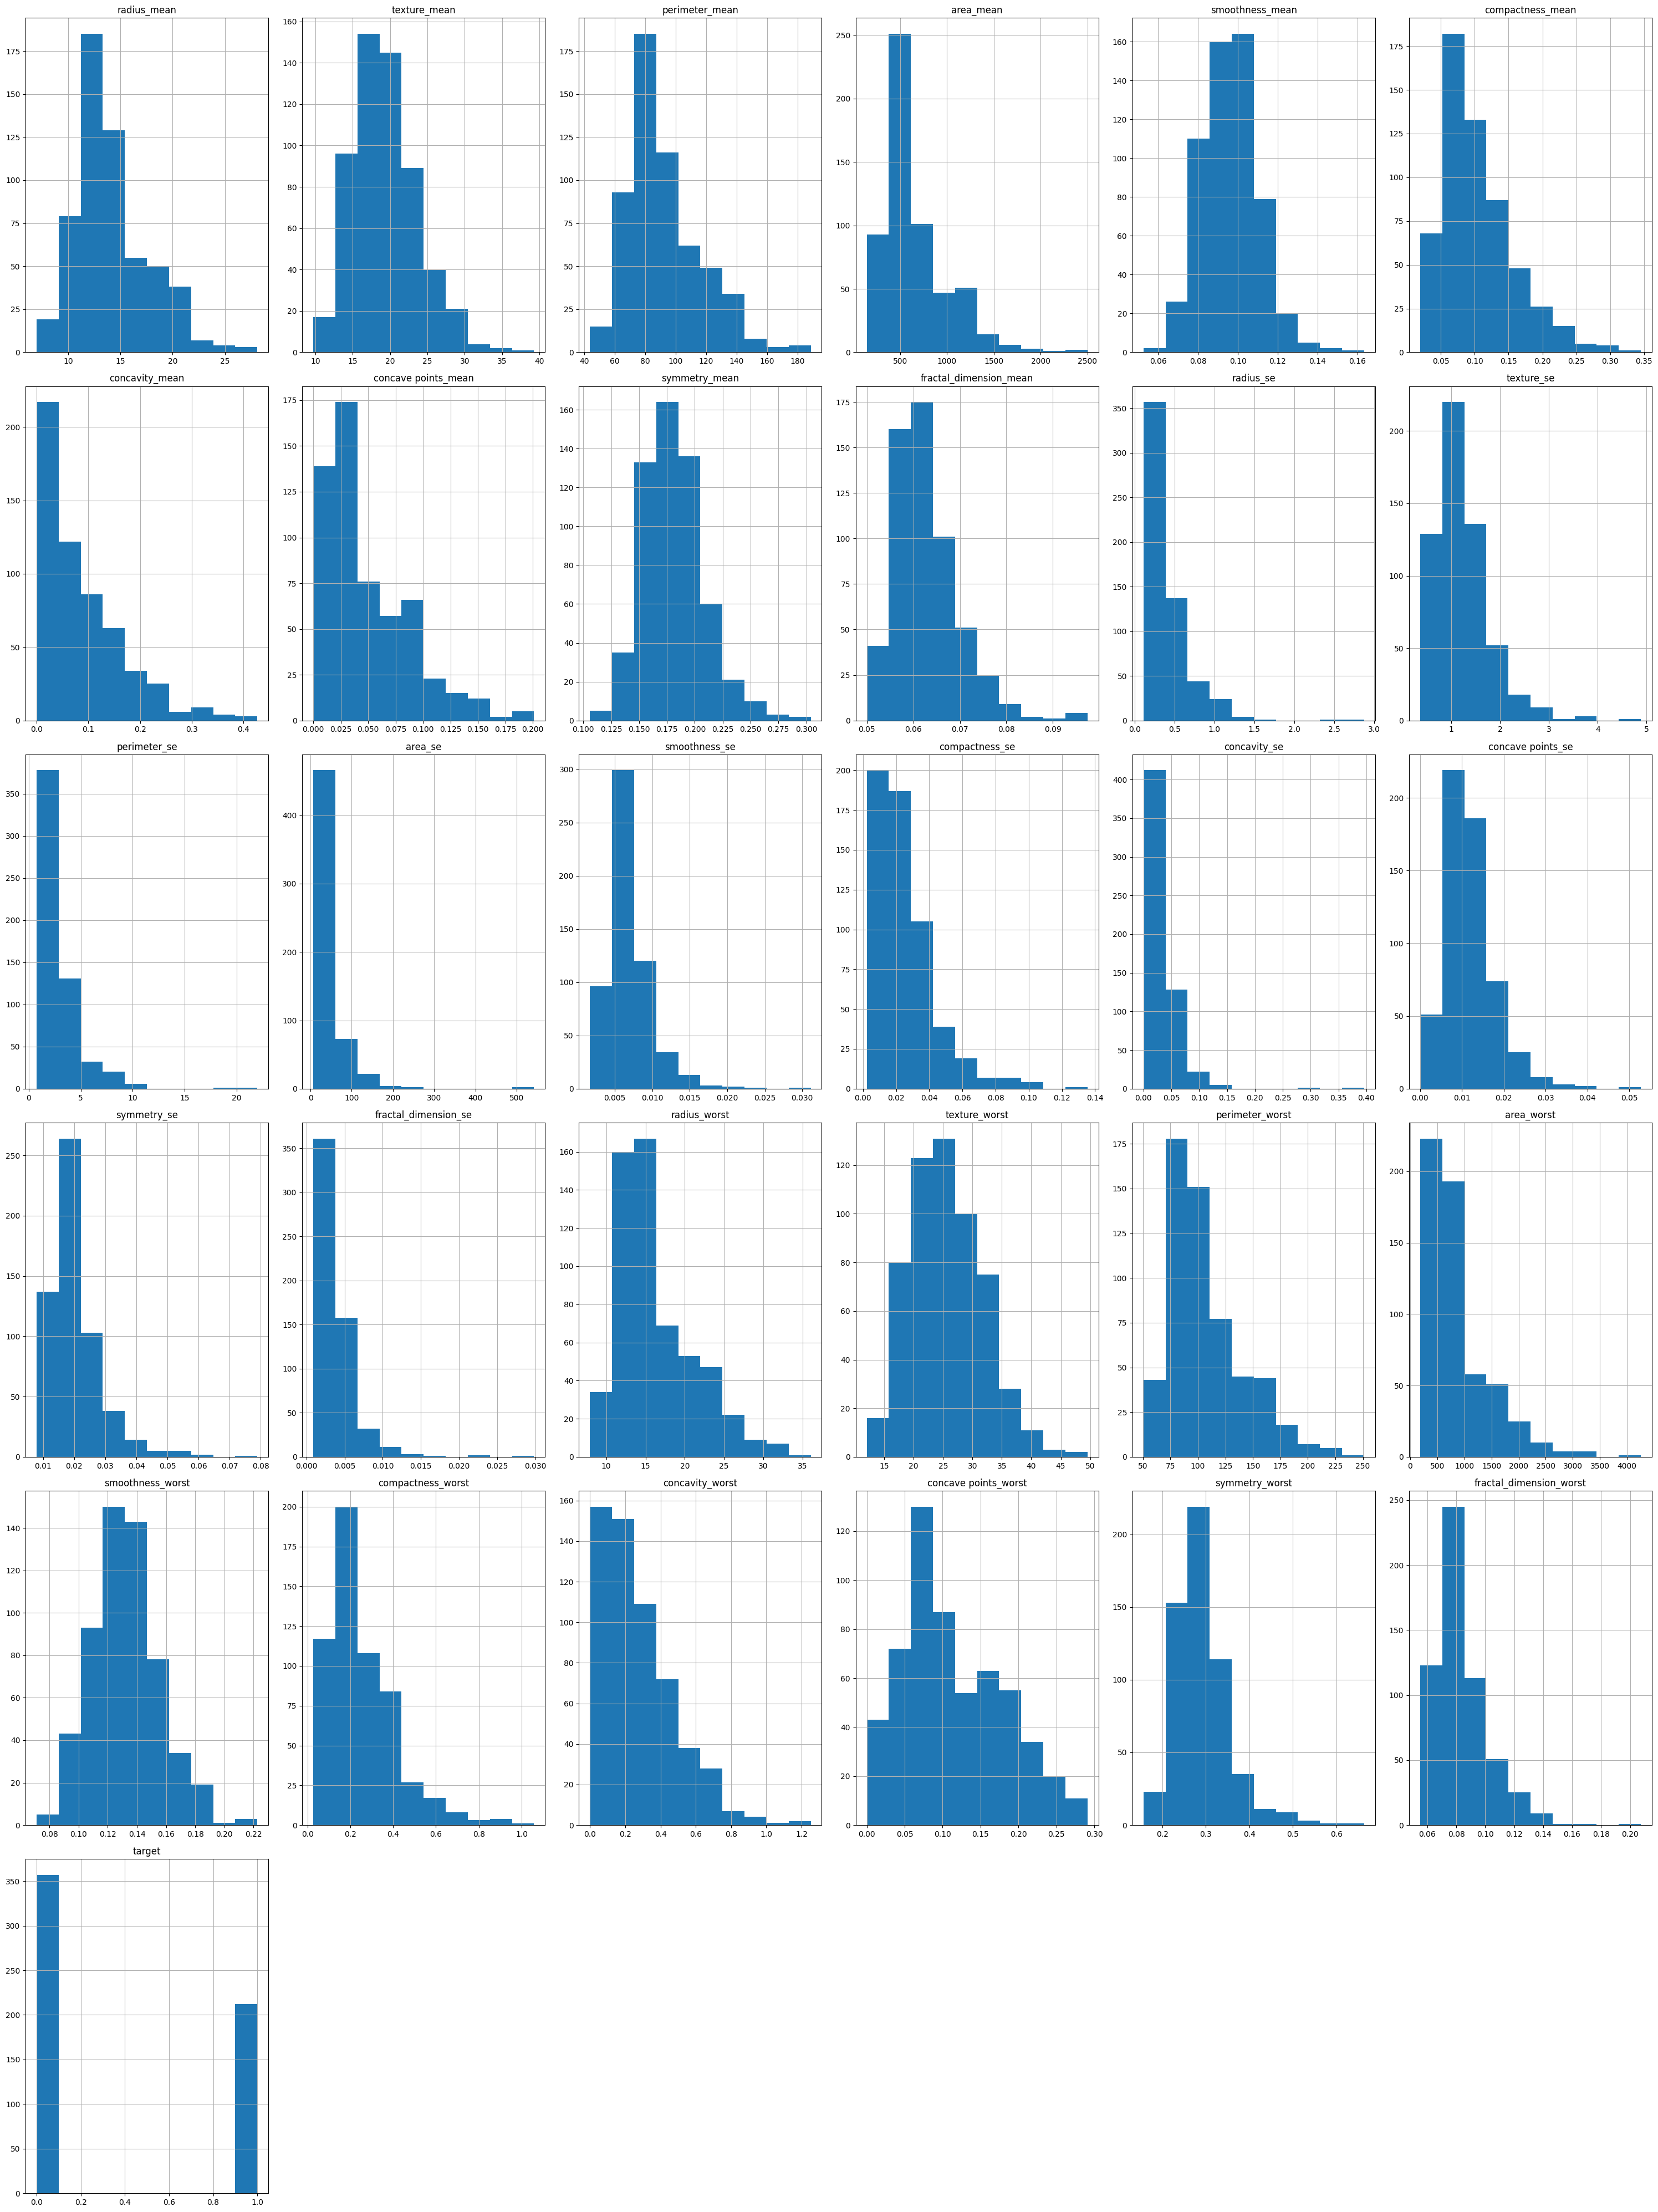

In [8]:
df.hist(figsize=(30, 40), )
plt.tight_layout()
plt.show()


**<h2>Countplot of Malignant and Benign Tissues**

Text(0.5, 1.0, 'Count of Malignant and Benign Breast Tissues')

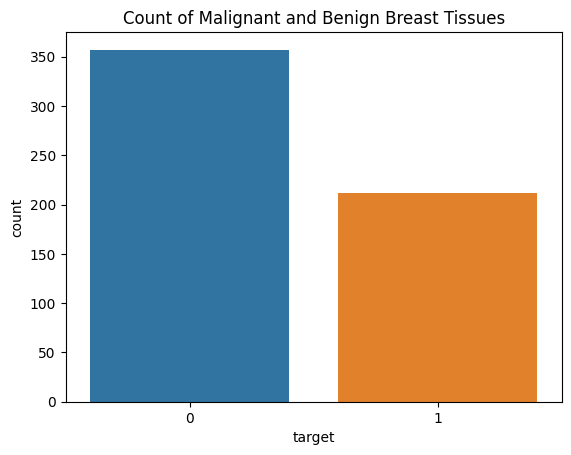

In [9]:
sns.countplot(x=df['target'] )
plt.title("Count of Malignant and Benign Breast Tissues")

where 1 represent Malignant and 0 represent benign

**<h2>XGB Boost Training**

In [10]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [11]:
d_train = xgb.DMatrix(df_train.drop('target', axis=1), label=df_train.target)
d_test = xgb.DMatrix(df_test.drop('target', axis=1), label = df_test.target)

In [12]:
param = {
    'eta': 0.05,
    'max_depth': 10,
    "objective": "binary:logistic",

}
num_round = 120
bst = xgb.train(param, d_train, num_round)

In [13]:
preds = bst.predict(d_test)
binary_preds = [1 if pred >= 0.5 else 0 for pred in preds]


In [14]:
accuracy_score(df_test['target'], binary_preds)

0.9824561403508771

**<h2>Feature Importance plot**

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

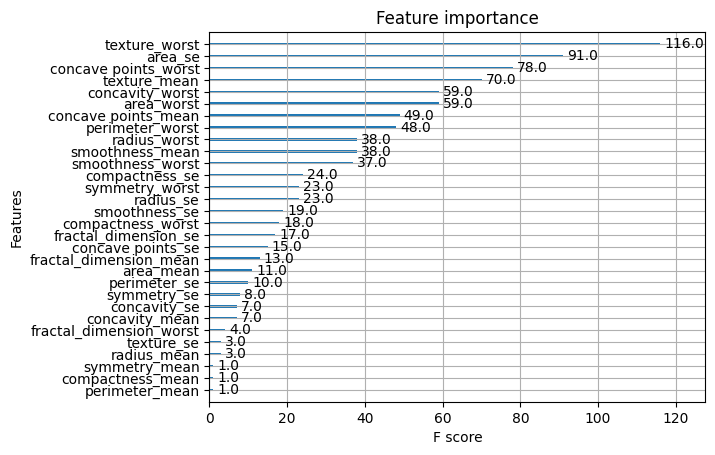

In [15]:
xgb.plot_importance(bst)

From the feature importance graph, it shows that texture_worst is the most significant feature in determining the breast is cancerous or not.

**<h3> Saving Model**

In [ ]:
# model_path = 'model.xgb'
# bst.save_model(model_path)

**<h2>Custom Testing**

In [16]:
values ="13	21.82	87.5	519.8	0.1273	0.1932	0.1859	0.09353	0.235	0.07389	0.3063	1.002	2.406	24.32	0.005731	0.03502	0.03553	0.01226	0.02143	0.003749	15.49	30.73	106.2	739.3	0.1703	0.5401	0.539	0.206	0.4378	0.1072".split()
values  = np.array(list(map(float, values)))
columns_names = df.columns.to_list()
mydf = pd.DataFrame(values.reshape(1, -1), columns=columns_names[:-1])
values = xgb.DMatrix(mydf)
prediction = bst.predict(values)[0]
print( 1 if prediction >= 0.5 else 0)


1
